In [24]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


In [2]:
trainXdata = np.load('./training/trainingX.npy')
trainYdata = np.load('./training/trainYdata.npy')
testXdata = np.load('./testing/testXdata.npy')
testYdata = np.load('./testing/testYdata.npy')

In [3]:
#trainYdata = np.asarray(trainYdata).astype('float32').reshape((-1,1))
#testYdata = np.asarray(testYdata).astype('float32').reshape((-1,1))

In [4]:
trainXdata.shape, trainYdata.shape

((5232, 150, 150, 1), (5232,))

In [5]:
testXdata.shape, testYdata.shape

((624, 150, 150, 1), (624,))

In [6]:
img_size = 150

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(trainXdata, trainYdata, test_size = 0.2, stratify = trainYdata,random_state=10)

In [8]:
X_train.shape,  Y_train.shape

((4185, 150, 150, 1), (4185,))

In [9]:
X_test.shape, Y_test.shape

((1047, 150, 150, 1), (1047,))

In [10]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size = (3,3), kernel_initializer = 'he_normal', padding='same', activation ='relu', input_shape = X_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64,kernel_size = (3,3), kernel_initializer = 'he_normal', padding='same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Dropout(0.25))
MaxPooling2D
model.add(Conv2D(filters = 128,kernel_size = (3,3), kernel_initializer = 'he_normal', padding='same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256,kernel_size = (5,5), kernel_initializer = 'he_normal', padding='same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Dropout(0.25))

#model.add(Conv2D(filters = 512,kernel_size = (3,3), kernel_initializer = 'he_normal', padding='same', activation ='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128,activation ='relu'))
model.add(Dropout(0.3))

model.add(Dense(256,activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation ='sigmoid'))

In [11]:
adam = Adam(lr=0.0005)

In [12]:
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0

In [13]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False    # randomly flip images
)  


datagen.fit(X_train)

In [14]:
disease_model = model.fit(datagen.flow(X_train,Y_train), 
                          batch_size=32,
                          epochs=20,
                          validation_data=datagen.flow(X_test,Y_test)
                          #callbacks = [EarlyStopping(monitor='val_accuracy', patience=5)]
                         )

Epoch 1/20
131/131 [==============================] - 338s 3s/step - loss: 0.5367 - accuracy: 0.7986 - val_loss: 9.6903 - val_accuracy: 0.7421
Epoch 2/20
131/131 [==============================] - 337s 3s/step - loss: 0.3121 - accuracy: 0.8626 - val_loss: 15.2082 - val_accuracy: 0.7421
Epoch 3/20
131/131 [==============================] - 337s 3s/step - loss: 0.2908 - accuracy: 0.8877 - val_loss: 19.6074 - val_accuracy: 0.7421
Epoch 4/20
131/131 [==============================] - 337s 3s/step - loss: 0.2804 - accuracy: 0.8858 - val_loss: 5.6152 - val_accuracy: 0.7421
Epoch 5/20
131/131 [==============================] - 336s 3s/step - loss: 0.2735 - accuracy: 0.8858 - val_loss: 2.7782 - val_accuracy: 0.7536
Epoch 6/20
131/131 [==============================] - 337s 3s/step - loss: 0.2366 - accuracy: 0.9073 - val_loss: 2.4796 - val_accuracy: 0.7641
Epoch 7/20
131/131 [==============================] - 337s 3s/step - loss: 0.2244 - accuracy: 0.9092 - val_loss: 0.2154 - val_accuracy: 0.93

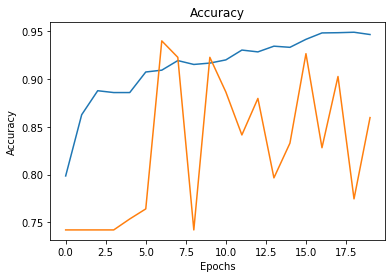

In [15]:
plt.figure()
plt.plot(disease_model.history['accuracy'], label='Training accuracy')
plt.plot(disease_model.history['val_accuracy'], label='Validation accuracy')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")                                                                                                  
plt.show()

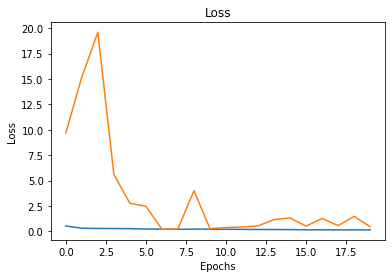

In [16]:
plt.figure()
plt.plot(disease_model.history['loss'], label='Training loss')
plt.plot(disease_model.history['val_loss'], label='Validation loss')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [17]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [18]:
y_pred = y_pred.reshape(1,-1)[0]
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [19]:
from sklearn.metrics import accuracy_score

In [325]:
accuracy_score(Y_test,y_pred)

0.9226361031518625

In [21]:
model.save('./model/PNP.h5')

In [25]:
modelN = load_model('./model/PNP.h5')

In [26]:
trainXdata

array([[[[0.09411765],
         [0.07058824],
         [0.0627451 ],
         ...,
         [0.3647059 ],
         [0.38039216],
         [0.37254903]],

        [[0.09411765],
         [0.07843138],
         [0.07058824],
         ...,
         [0.36862746],
         [0.36862746],
         [0.3647059 ]],

        [[0.08235294],
         [0.08235294],
         [0.07450981],
         ...,
         [0.37254903],
         [0.3529412 ],
         [0.35686275]],

        ...,

        [[0.10588235],
         [0.10980392],
         [0.10196079],
         ...,
         [0.15294118],
         [0.16078432],
         [0.15686275]],

        [[0.11372549],
         [0.11372549],
         [0.10980392],
         ...,
         [0.2627451 ],
         [0.2509804 ],
         [0.25490198]],

        [[0.15294118],
         [0.16078432],
         [0.16862746],
         ...,
         [0.39215687],
         [0.3882353 ],
         [0.3882353 ]]],


       [[[0.06666667],
         [0.08627451],
         [0.12

In [27]:
trainYdata

array([0, 0, 0, ..., 1, 1, 1])